# Manipulating raster/vector data with geoutils

xdem relies on a second library, developed by the same group of people, to easily handle raster and vector data: **geoutils !** \
Documentation: https://geoutils.readthedocs.io

### Import the necessary modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import geoutils as gu
import xdem

### Download the sample data set (if not done already) - Should take a few seconds ###
The code comes with some data for showcasing the functionality, here two DEMs over Longyearbyen, Norway and glacier outlines over Svalbard. \
The files are already on disk, we only nned to find their location.

In [2]:
xdem.examples.download_longyearbyen_examples(overwrite=False)
print(xdem.examples.FILEPATHS_DATA["longyearbyen_ref_dem"])
print(xdem.examples.FILEPATHS_DATA["longyearbyen_tba_dem"])
print(xdem.examples.FILEPATHS_DATA["longyearbyen_glacier_outlines"])

/usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/DEM_2009_ref.tif
/usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/DEM_1990.tif
/usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/glacier_mask/CryoClim_GAO_SJ_1990.shp


### Read the two DEMs and glacier outlines for the region ###

Raster files (e.g. GeoTiff) can be loaded in one line with `gu.Raster(path_to_file)`. In xdem, the DEM class inherit the same functionalities and more, so here we use `xdem.DEM`.

In [3]:
dem_2009 = xdem.DEM(xdem.examples.FILEPATHS_DATA["longyearbyen_ref_dem"])
dem_1990 = xdem.DEM(xdem.examples.FILEPATHS_DATA["longyearbyen_tba_dem"])

Vector files (e.g. ESRI shapefiles) can be loaded in one line with `gu.Vector(path_to_file)`.

In [4]:
outlines_1990 = gu.Vector(xdem.examples.FILEPATHS_DATA["longyearbyen_glacier_outlines"])

### Quickly visualize a raster
Since a Raster object comes with all atributes, it can be quickly plot with its georeferencing information.

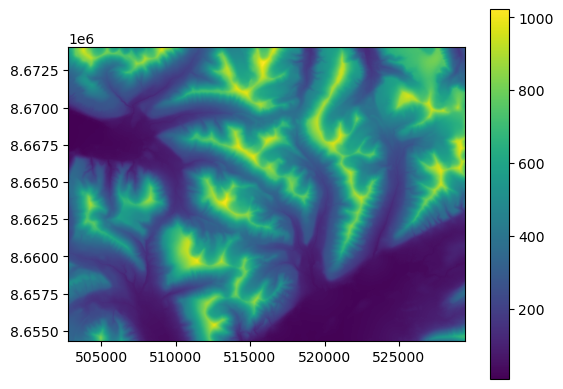

In [5]:
dem_2009.show()

It is easier to visualize as a hillshade

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


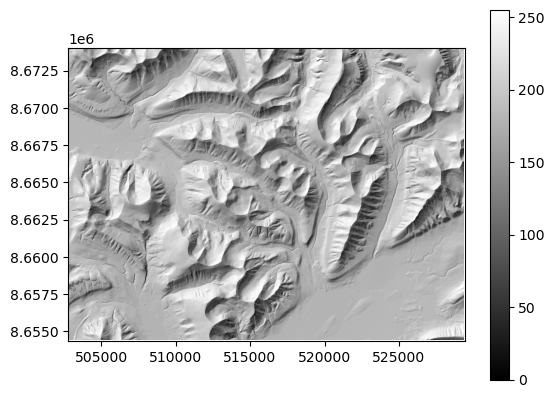

In [6]:
dem_2009_hs = xdem.terrain.hillshade(dem_2009)
dem_2009_hs.show(cmap='gray')

### Quickly visualize vector data

<AxesSubplot: >

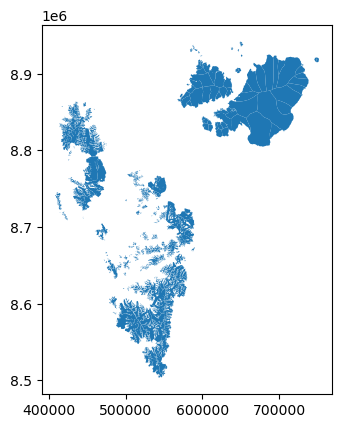

In [7]:
outlines_1990.ds.plot()

### Notes on the Raster and Vector classes

#### The `xdem.DEM` instances inherit from the `geoutils.Raster` class, which is based upon **rasterio**. 
These objects contain the raster metadata, with the same convention as rasterio. 
To georeference an object, one needs to know the coordinate reference system (called `crs` in rasterio/geopandas) and any 3 of these four information:
- the raster width and height
- the pixel resolution
- the extent of the raster (called `bounds` in rasterio/geopandas)
- the position of one pixel, traditionally, the upper-left \
These variables are inter-dependent, e.g. if one knows the raster's extent and width and height, the pixel resolution is fixed.
All these variables are stored in the `xdem.DEM` instance with the following attributes:

In [8]:
print(f"As PROJ4 string: {dem_2009.crs.to_proj4()}\n")
print(f"As WKT string: \n{dem_2009.crs.to_wkt()}")

As PROJ4 string: +init=epsg:25833

As WKT string: 
PROJCS["ETRS89 / UTM zone 33N",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","25833"]]


In [9]:
dem_2009.width

1332

In [10]:
dem_2009.height

985

In [11]:
dem_2009.res

(20.0, 20.0)

In [12]:
dem_2009.bounds

BoundingBox(left=502810.0, bottom=8654330.0, right=529450.0, top=8674030.0)

The resolution and position of the upper left pixel are traditionally stored in a so-called [transform](https://rasterio.readthedocs.io/en/latest/topics/transforms.html):

In [13]:
dem_2009.transform

Affine(20.0, 0.0, 502810.0,
       0.0, -20.0, 8674030.0)

These information, and more, can all be obtained **at once** with the command

In [14]:
print(dem_2009)

Driver:               GTiff 
Opened from file:     /usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/DEM_2009_ref.tif 
Filename:             /usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/DEM_2009_ref.tif 
Raster modified since disk load?  False 
Size:                 1332, 985
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:25833']
NoData Value:         -9999.0
Pixel Size:           20.0, 20.0
Upper Left Corner:    502810.0, 8654330.0
Lower Right Corner:   529450.0, 8674030.0



or similarly with `dem_2009.info()`.

Along with these metadata, the `xdem.DEM` object contains the data, stored as a numpy masked array in the `self.data` attribute:

In [15]:
dem_2009.data

masked_array(
  data=[[[585.1568603515625, 593.7670288085938, 599.27587890625, ...,
          276.78131103515625, 287.1056823730469, 296.2648620605469],
         [585.667236328125, 594.3804321289062, 603.4343872070312, ...,
          276.9458923339844, 288.22772216796875, 298.573486328125],
         [584.7866821289062, 594.0465087890625, 602.7151489257812, ...,
          275.3355407714844, 285.9632263183594, 296.79010009765625],
         ...,
         [360.0013122558594, 359.192138671875, 358.2886657714844, ...,
          558.6853637695312, 561.381103515625, 565.4931640625],
         [360.65240478515625, 359.96295166015625, 359.01483154296875,
          ..., 543.9490966796875, 546.5569458007812, 550.02880859375],
         [361.43194580078125, 360.63262939453125, 359.747802734375, ...,
          529.3741455078125, 532.504150390625, 537.7479248046875]]],
  mask=[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, Fa

#### `gu.Vector` instances are based upon geopandas. 
The class contains several useful methods (`self.create_mask` is showcased below), and the GeoDataFrame can accessed via:

In [16]:
outlines_1990.ds

,NAME,Comment,IDENT,YEAR_,DDMM,SOURCE,ANALYST,YR_UNCERT,Shape_Area,FLAG,LENGTH,FWIDTH,Shape_Peri,geometry
0,Tindebreen,None,16107.0,1990,3107,Vertical aerial photograph,b'Max K\xf6nig',Exact day of photo aquisition not certain,1.077654e+06,0,2249.320430,257.496584,5904.870726,"POLYGON ((439199.970 8850128.111, 439211.020 8..."
1,b'Vestre Andr\xe9ebreen',None,16114.0,1990,3107,Vertical aerial photograph,b'Max K\xf6nig',Exact day of photo aquisition not certain,5.415100e+06,0,5434.124456,538.378473,13432.482627,"POLYGON ((448202.475 8847065.502, 448235.057 8..."
2,None,None,16113.0,1990,3107,Vertical aerial photograph,b'Max K\xf6nig',Exact day of photo aquisition not certain,6.749008e+05,0,1568.840403,184.097433,4651.214841,"POLYGON ((447999.467 8844946.655, 448029.065 8..."
3,Kvasspiggbreen,None,15801.0,1990,3107,Vertical aerial photograph,b'Max K\xf6nig',Exact day of photo aquisition not certain,2.474044e+06,0,2188.915410,653.981517,9019.472010,"POLYGON ((421605.655 8843053.060, 421602.140 8..."
4,Knattbreen,None,15723.0,1990,3107,Vertical aerial photograph,b'Max K\xf6nig',Exact day of photo aquisition not certain,2.735258e+06,0,3154.486785,364.844640,11232.537224,"POLYGON ((419471.886 8841789.259, 419483.147 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,Ringarbreane,None,13108.3,1990,3107,Vertical aerial photograph,Christopher Nuth,Exact day of photo aquisition not certain,9.576773e+05,0,1579.262328,282.046808,5739.966236,"POLYGON ((480263.106 8604978.244, 480266.172 8..."
1078,Ringarbreane,None,13108.1,1990,3107,Vertical aerial photograph,Christopher Nuth,Exact day of photo aquisition not certain,1.031565e+06,0,1818.931778,281.092459,5927.559794,"POLYGON ((478788.280 8606383.170, 478861.693 8..."
1079,None,None,11504.2,1990,3107,Vertical aerial photograph,Christopher Nuth,Exact day of photo aquisition not certain,6.416001e+05,0,1423.222427,196.457584,4033.809148,"POLYGON ((559457.505 8595826.170, 559439.851 8..."
1080,Greinebreane E,None,13604.1,1990,3107,Vertical aerial photograph,Christopher Nuth,Exact day of photo aquisition not certain,1.807680e+06,0,3371.559966,215.422235,12133.082971,"POLYGON ((525541.871 8648111.027, 525345.437 8..."


## Rasters operations

### Reproject the two DEMs on the same grid
Here the function returns a warning because the two DEMs are already on the same grid, so nothing is done.

In [17]:
dem_1990 = dem_1990.reproject(dst_ref=dem_2009)
print(dem_1990)
print(dem_2009)

Driver:               GTiff 
Opened from file:     /usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/DEM_1990.tif 
Filename:             /usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/DEM_1990.tif 
Raster modified since disk load?  False 
Size:                 1332, 985
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:25833']
NoData Value:         -9999.0
Pixel Size:           20.0, 20.0
Upper Left Corner:    502810.0, 8654330.0
Lower Right Corner:   529450.0, 8674030.0

Driver:               GTiff 
Opened from file:     /usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/DEM_2009_ref.tif 
Filename:             /usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/examples/data/Longyearbyen/data/DEM_2009_ref.tif 
Raster modified since disk lo

/usr/local/Caskroom/miniconda/base/envs/xdem-demo/lib/python3.10/site-packages/geoutils/georaster/raster.py:1577: UserWarning: Output projection, bounds and size are identical -> return self (not a copy!)
  warnings.warn("Output projection, bounds and size are identical -> return self (not a copy!)")


### Reproject to a given resolution, bounds, or CRS

Change pixel resolution

In [18]:
dem_test = dem_1990.reproject(dst_res=60)
print(dem_test.info())

Driver:               None 
Opened from file:     None 
Filename:             None 
Raster modified since disk load?  True 
Size:                 444, 329
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:25833']
NoData Value:         -9999.0
Pixel Size:           60.0, 60.0
Upper Left Corner:    502810.0, 8654290.0
Lower Right Corner:   529450.0, 8674030.0



Change extent/bounds

In [19]:
dem_test = dem_1990.reproject(dst_bounds={"left":502810, "top":8674000, "right":529430, "bottom": 8654290})
print(dem_test.info())

Driver:               None 
Opened from file:     None 
Filename:             None 
Raster modified since disk load?  True 
Size:                 1331, 986
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:25833']
NoData Value:         -9999.0
Pixel Size:           20.0, 19.989858012170384
Upper Left Corner:    502810.0, 8654290.0
Lower Right Corner:   529430.0, 8674000.0



Change CRS

In [20]:
dem_test = dem_1990.reproject(dst_crs='epsg:4326')
print(dem_test.info())

Driver:               None 
Opened from file:     None 
Filename:             None 
Raster modified since disk load?  True 
Size:                 1666, 257
Number of bands:      1
Data types:           ('float32',)
Coordinate System:    ['EPSG:4326']
NoData Value:         -9999.0
Pixel Size:           0.0006980470058920598, 0.0006980470058920598
Upper Left Corner:    15.120710653332189, 77.96090050488883
Lower Right Corner:   16.28365696514836, 78.14029858540309



### Reproject the outlines in the same coordinate system as DEMs

In [21]:
outlines_proj = gu.Vector(outlines_1990.ds.to_crs(dem_2009.crs))

### Calculate the elevation change

In [22]:
ddem = dem_2009 - dem_1990

### Plot the elevation change map
#### Note: 
- `ax` is used here to share the same subplot between the raster and outlines (the default is to create a new figure)
- ddem is plotted last, to preserve the extent, as glacier outlines cover all of Svalbard.
- zorder is used to plot in the right sequence (outlines on top)

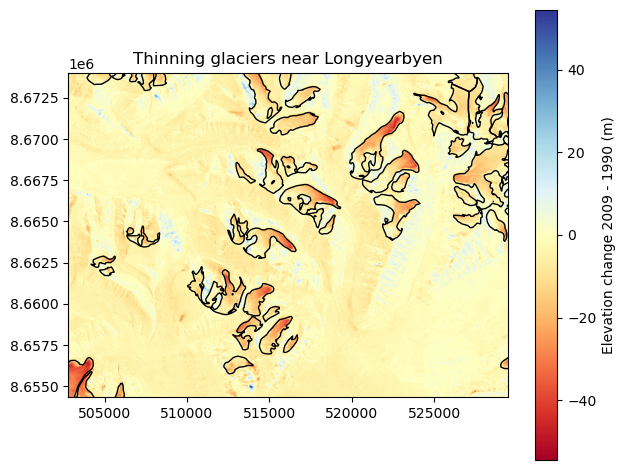

In [23]:
vmax = max(abs(np.max(ddem.data)), abs(np.min(ddem.data)))

ax = plt.subplot(111)
outlines_proj.ds.plot(ax=ax, facecolor='none', edgecolor='k', zorder=2)
ddem.show(ax=ax, cmap='RdYlBu', vmin=-vmax, vmax=vmax, cb_title='Elevation change 2009 - 1990 (m)', zorder=1)
ax.set_title('Thinning glaciers near Longyearbyen')
plt.tight_layout()
plt.show()

### Saving the results

In [24]:
ddem.save("temp_ddem.tif")

### Rasterize the glacier outlines on the same grid as ddem
`glacier_mask` is `True` on glaciers, `False` elsewhere.

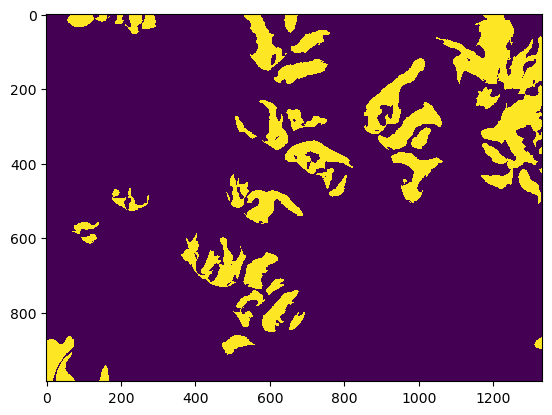

In [25]:
glacier_mask = outlines_1990.create_mask(ddem)
plt.imshow(glacier_mask.squeeze(), interpolation='none')

### Calculate mean dh over glaciers or stable terrain

Over glaciers:

In [26]:
print(np.mean(ddem.data[glacier_mask]))

-11.245888014916156


Over stable terrain

In [27]:
print(np.mean(ddem.data[~glacier_mask]))

-2.108906927134588


Something is wrong, mean dh over stable terrain should be ~0 => we need to coregister the DEMs. 
This is some proper work for our next example !